# Mini-projet IA (classification) :  
## Risques Cardiovasculaires

### 1. Data understanding (compréhension des données) : 

##### 1.1 Chargement et affichage

In [4]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
#chargement
dataset = pd.read_csv("Cardiovascular_Diseases.csv")
target_column = "Heart_Disease"
#Affichage des données
dataset.head(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_14884\1760692989.py:6: DtypeWarning: Columns (12,13) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv("Cardiovascular_Diseases.csv")


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0
5,Good,Within the past year,No,No,No,No,Yes,No,Yes,Male,60-64,183.0,154.22,46.11,No,0.0,12.0,12.0,12.0
6,Fair,Within the past year,Yes,Yes,No,No,No,No,Yes,Male,60-64,175.0,69.85,22.74,Yes,0.0,16.0,8.0,0.0
7,Good,Within the past year,Yes,No,No,No,No,No,Yes,Female,65-69,165.0,108.86,39.94,Yes,3.0,30.0,8.0,8.0
8,Fair,Within the past year,No,No,No,No,Yes,No,No,Female,65-69,163.0,72.57,27.46,Yes,0.0,12.0,12.0,4.0
9,Fair,Within the past year,No,No,No,No,No,Yes,Yes,Female,70-74,163.0,91.63,34.67,No,0.0,12.0,12.0,1.0


##### 1.2 Description

In [15]:
#volume : nombre total d'instances
#dimension : nombre total des attributs
print("(volume , dimension) =" ,dataset.shape)

(volume , dimension) = (308854, 19)


In [5]:
#type et codage
dataset.dtypes

General_Health                   object
Checkup                          object
Exercise                         object
Heart_Disease                    object
Skin_Cancer                      object
Other_Cancer                     object
Depression                       object
Diabetes                         object
Arthritis                        object
Sex                              object
Age_Category                     object
Height_(cm)                     float64
Weight_(kg)                      object
BMI                              object
Smoking_History                  object
Alcohol_Consumption             float64
Fruit_Consumption               float64
Green_Vegetables_Consumption    float64
FriedPotato_Consumption         float64
dtype: object

In [9]:
#information sur le dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       299312 non-null  object 
 2   Exercise                      299312 non-null  object 
 3   Heart_Disease                 299312 non-null  object 
 4   Skin_Cancer                   299312 non-null  object 
 5   Other_Cancer                  299312 non-null  object 
 6   Depression                    299312 non-null  object 
 7   Diabetes                      299312 non-null  object 
 8   Arthritis                     299312 non-null  object 
 9   Sex                           299312 non-null  object 
 10  Age_Category                  299312 non-null  object 
 11  Height_(cm)                   299287 non-null  float64
 12  Weight_(kg)                   299311 non-nul

<div class="alert alert-info">
<h3>Note</h3>
<p>
    BMI et le Weight_(kg) sont considérés object, donc il faut les transformer en valeur numérique.
</p>
</div>

In [11]:
#statistiques
print(dataset.describe(include='all'))

       General_Health               Checkup Exercise Heart_Disease  \
count          308854                299312   299312        299312   
unique           9547                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           107449                231520   232412        275231   
mean              NaN                   NaN      NaN           NaN   
std               NaN                   NaN      NaN           NaN   
min               NaN                   NaN      NaN           NaN   
25%               NaN                   NaN      NaN           NaN   
50%               NaN                   NaN      NaN           NaN   
75%               NaN                   NaN      NaN           NaN   
max               NaN                   NaN      NaN           NaN   

       Skin_Cancer Other_Cancer Depression Diabetes Arthritis     Sex  \
count       299312       299312     299312   299312    299312  299312   
unique       

<div class="alert alert-warning">
<h3>Note</h3>
<p>
    
</p>
</div>

In [16]:
print(dataset.columns)

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')


##### visualisation


Heart_Disease
No     275231
Yes     24081
Name: count, dtype: int64


Text(0.5, 1.0, 'Heart_Disease')

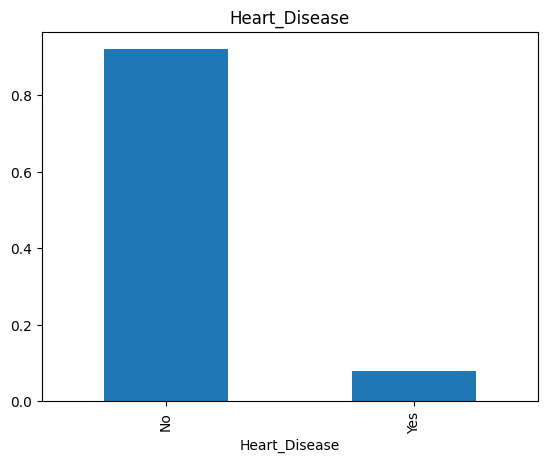

In [5]:
print(dataset[target_column].value_counts())
dataset.Heart_Disease.value_counts(normalize=True).plot(kind='bar', alpha=1)
plt.title('Heart_Disease')

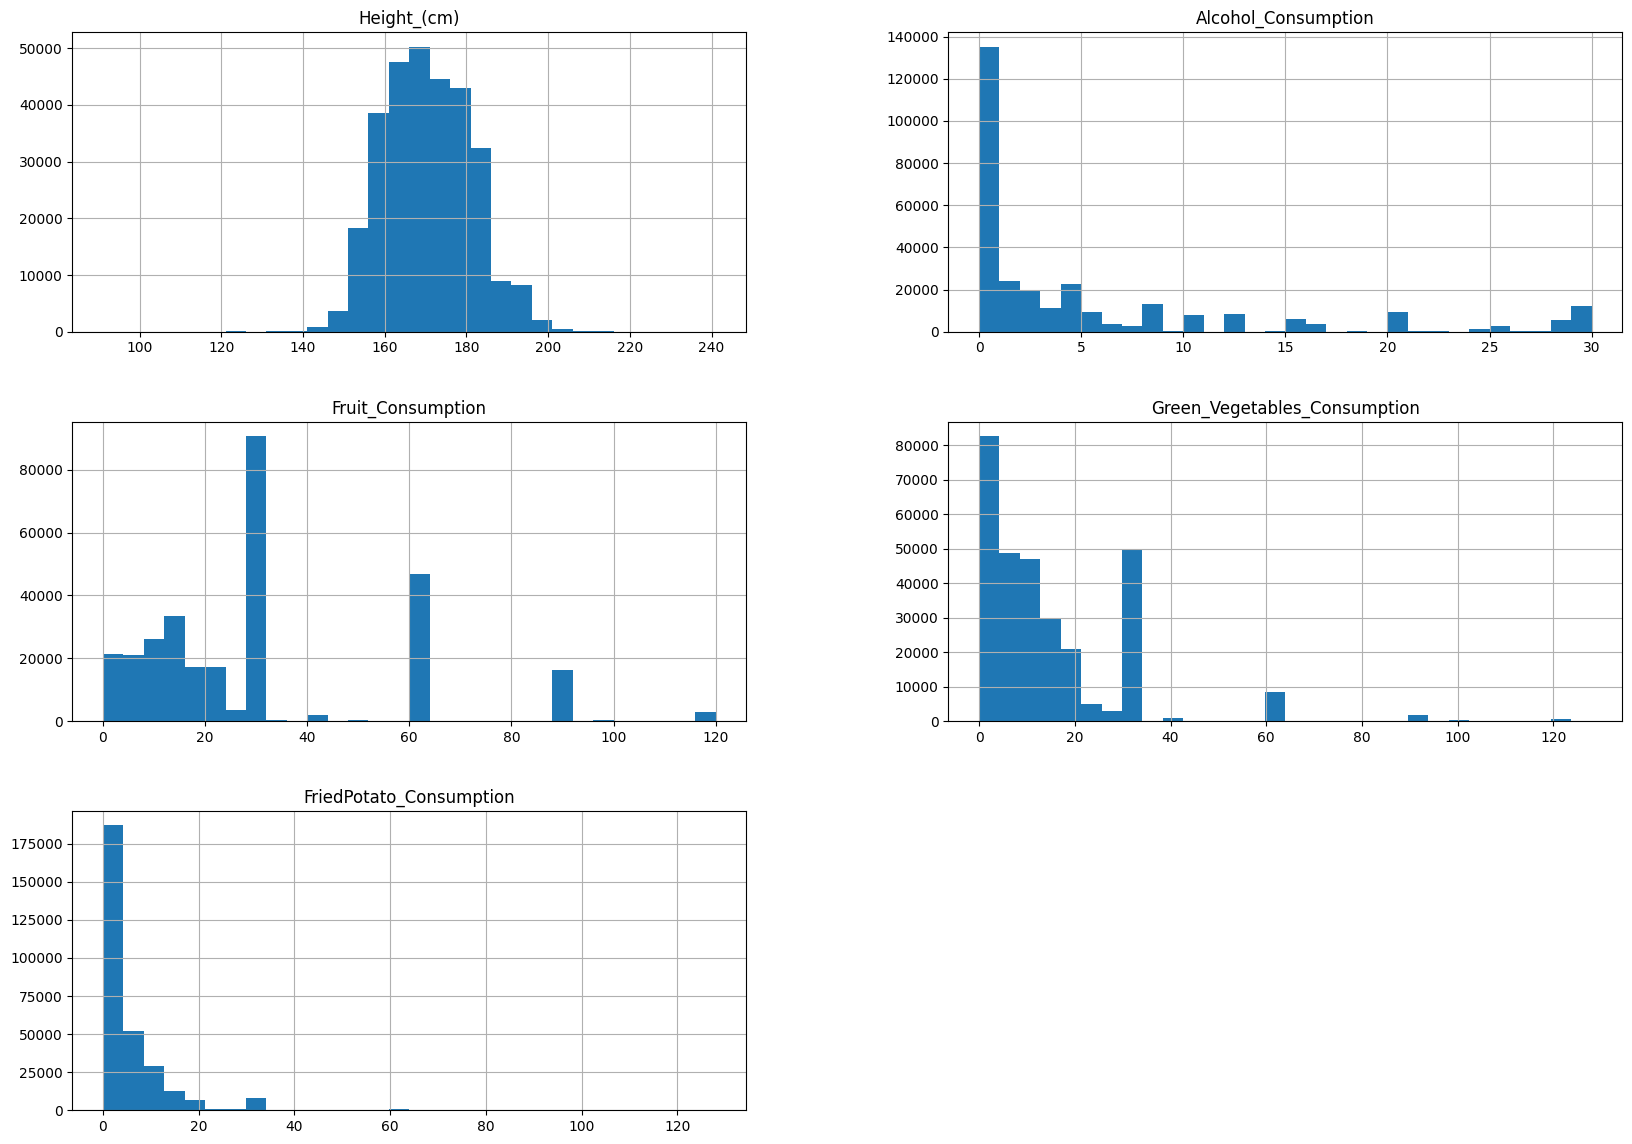

In [19]:
_ = dataset.hist(figsize=(20, 14),bins=30)
#the graph are missing the weight , bmi 
#even though they are numbers because of some issues in the data so they are 

In [29]:
columns = dataset.columns
object_columns = dataset.drop(dataset.columns[3], axis=1).select_dtypes(include='object').columns.tolist()# Print the names of object columns
print(object_columns)

['General_Health', 'Checkup', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex', 'Age_Category', 'Weight_(kg)', 'BMI', 'Smoking_History']


In [6]:
#those lines under generate an error
#sns.countplot(x =target_column , hue = "General_Health", data = dataset)
#plt.show()

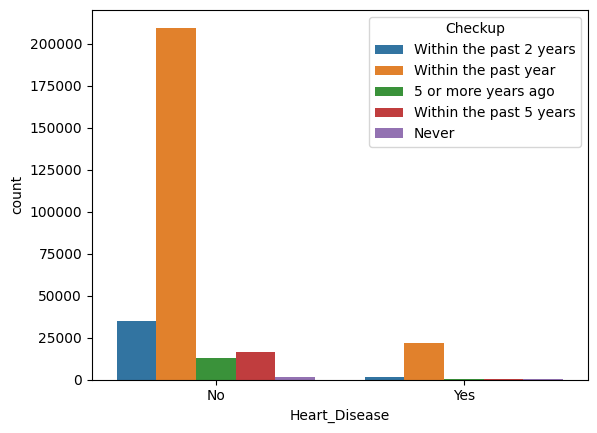

In [39]:
sns.countplot(x =target_column , hue = "Checkup", data = dataset)
plt.show()

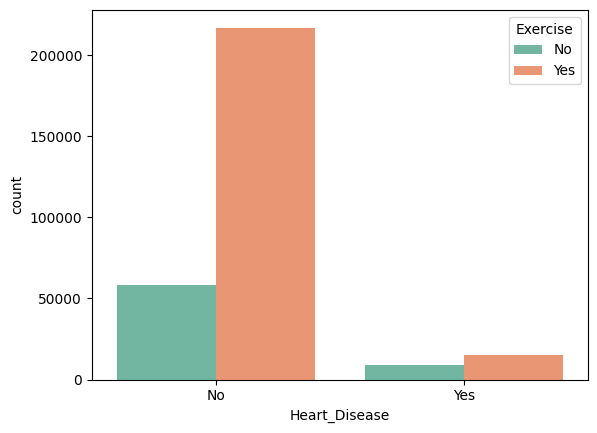

In [51]:
sns.countplot(x =target_column , hue = 'Exercise', data = dataset ,palette = "Set2")
plt.show()

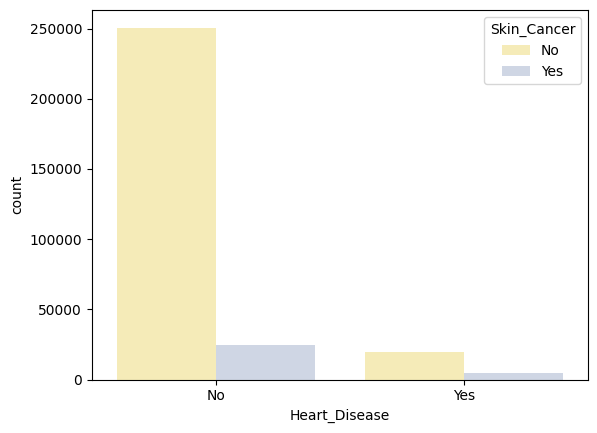

In [53]:
sns.countplot(x =target_column , hue = 'Skin_Cancer', data = dataset , palette = "Pastel2_r")
plt.show()

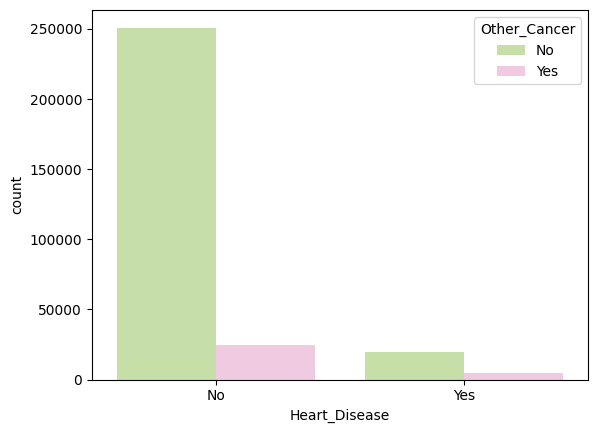

In [54]:
sns.countplot(x =target_column , hue = 'Other_Cancer', data = dataset ,palette = "PiYG_r" )
plt.show()

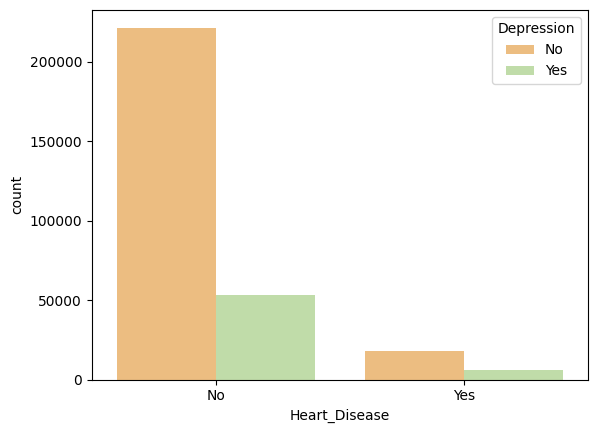

In [56]:
sns.countplot(x =target_column , hue = 'Depression', data = dataset ,palette = "Spectral")
plt.show()

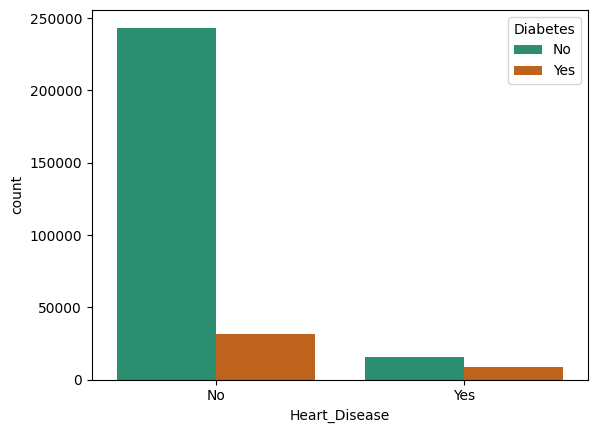

In [57]:
sns.countplot(x =target_column , hue = 'Diabetes', data = dataset , palette = "Dark2")
plt.show()

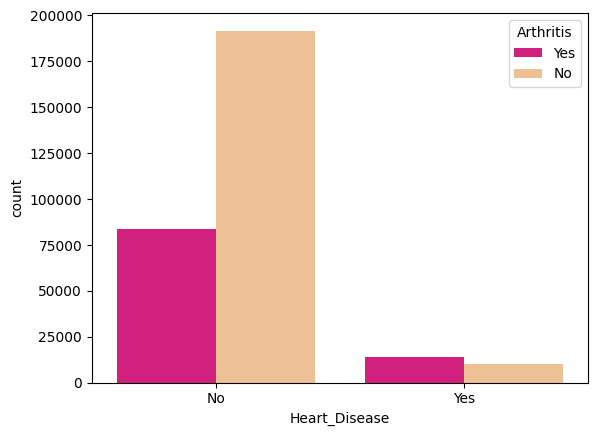

In [58]:
sns.countplot(x =target_column , hue = 'Arthritis', data = dataset , palette = "Accent_r")
plt.show()

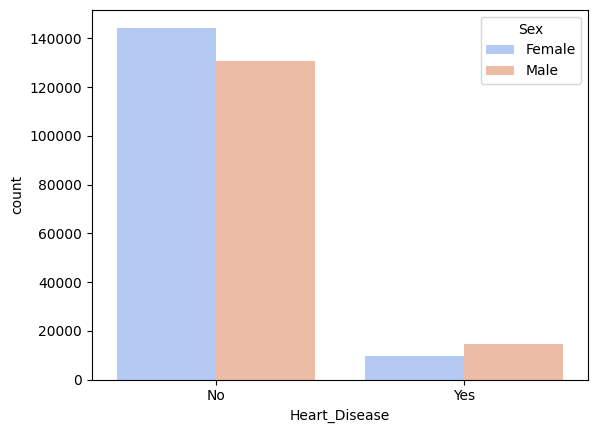

In [59]:
sns.countplot(x =target_column , hue = 'Sex', data = dataset , palette='coolwarm')
plt.show()

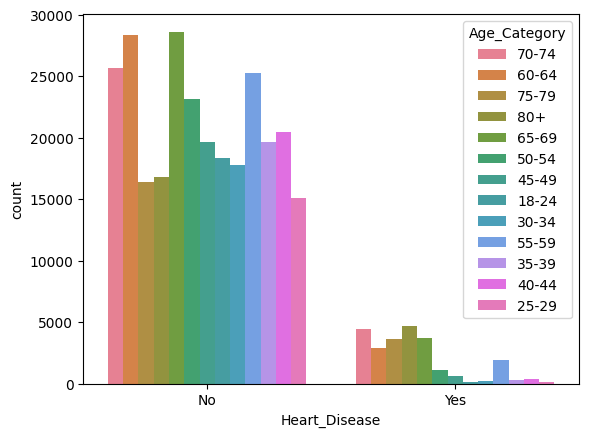

In [49]:
sns.countplot(x =target_column , hue = 'Age_Category', data = dataset)
plt.show()

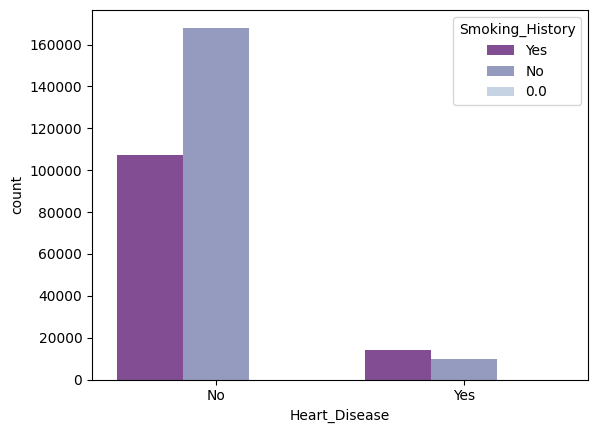

In [65]:
sns.countplot(x =target_column , hue ='Smoking_History', data = dataset , palette='BuPu_r')
plt.show()

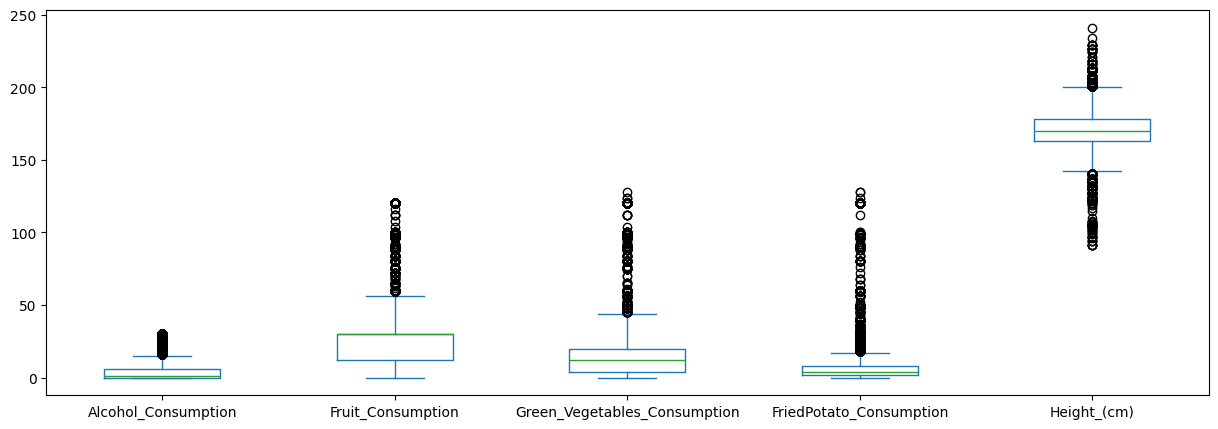

In [8]:
#boite à moustache:
dataset.plot(kind='box', figsize=(15,5),x="Heart_Disease", y=["Alcohol_Consumption","Fruit_Consumption","Green_Vegetables_Consumption","FriedPotato_Consumption","Height_(cm)"])
plt.show()

<div class="alert alert-info">
<h3>Interpretation</h3>
<p>
    
</p>
</div>